# **Histogram**


## Objectives


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


#### Download the database file.


In [ ]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-05 08:56:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  79.4MB/s    in 2.5s    

2025-05-05 08:56:26 (79.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [ ]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [ ]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


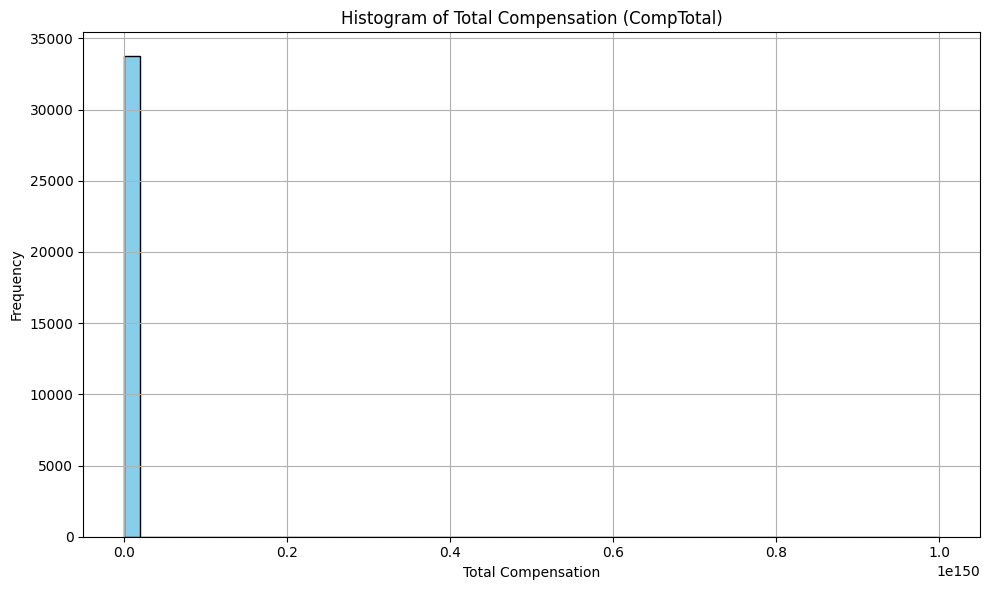

In [ ]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_comptotal = pd.read_sql_query(QUERY, conn)

df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')

plt.figure(figsize=(10, 6))
df_comptotal['CompTotal'].dropna().plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


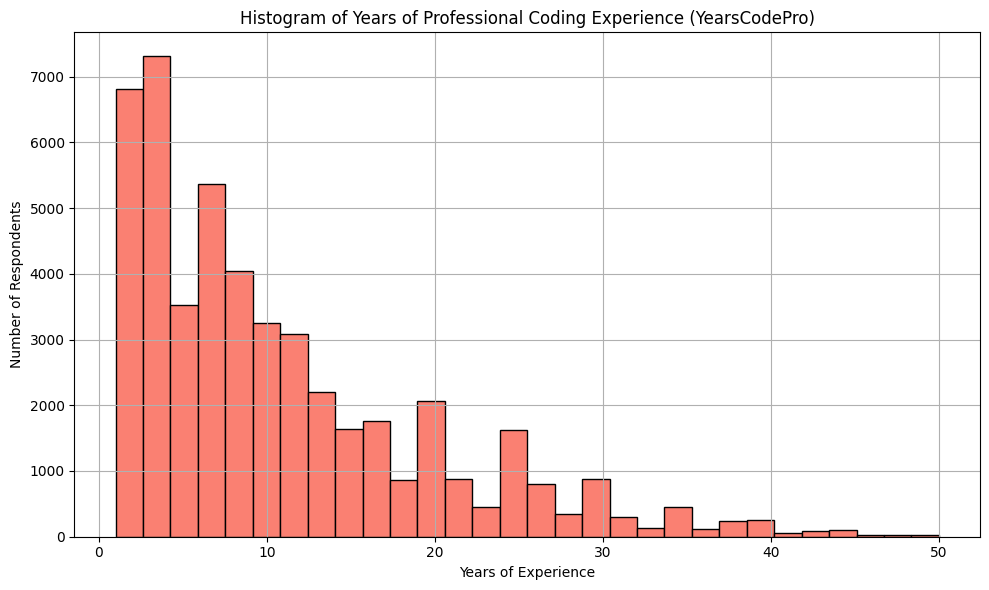

In [ ]:
## Write your code here
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df_exp = pd.read_sql_query(QUERY, conn)


df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

plt.figure(figsize=(10, 6))
df_exp['YearsCodePro'].dropna().plot(kind='hist', bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


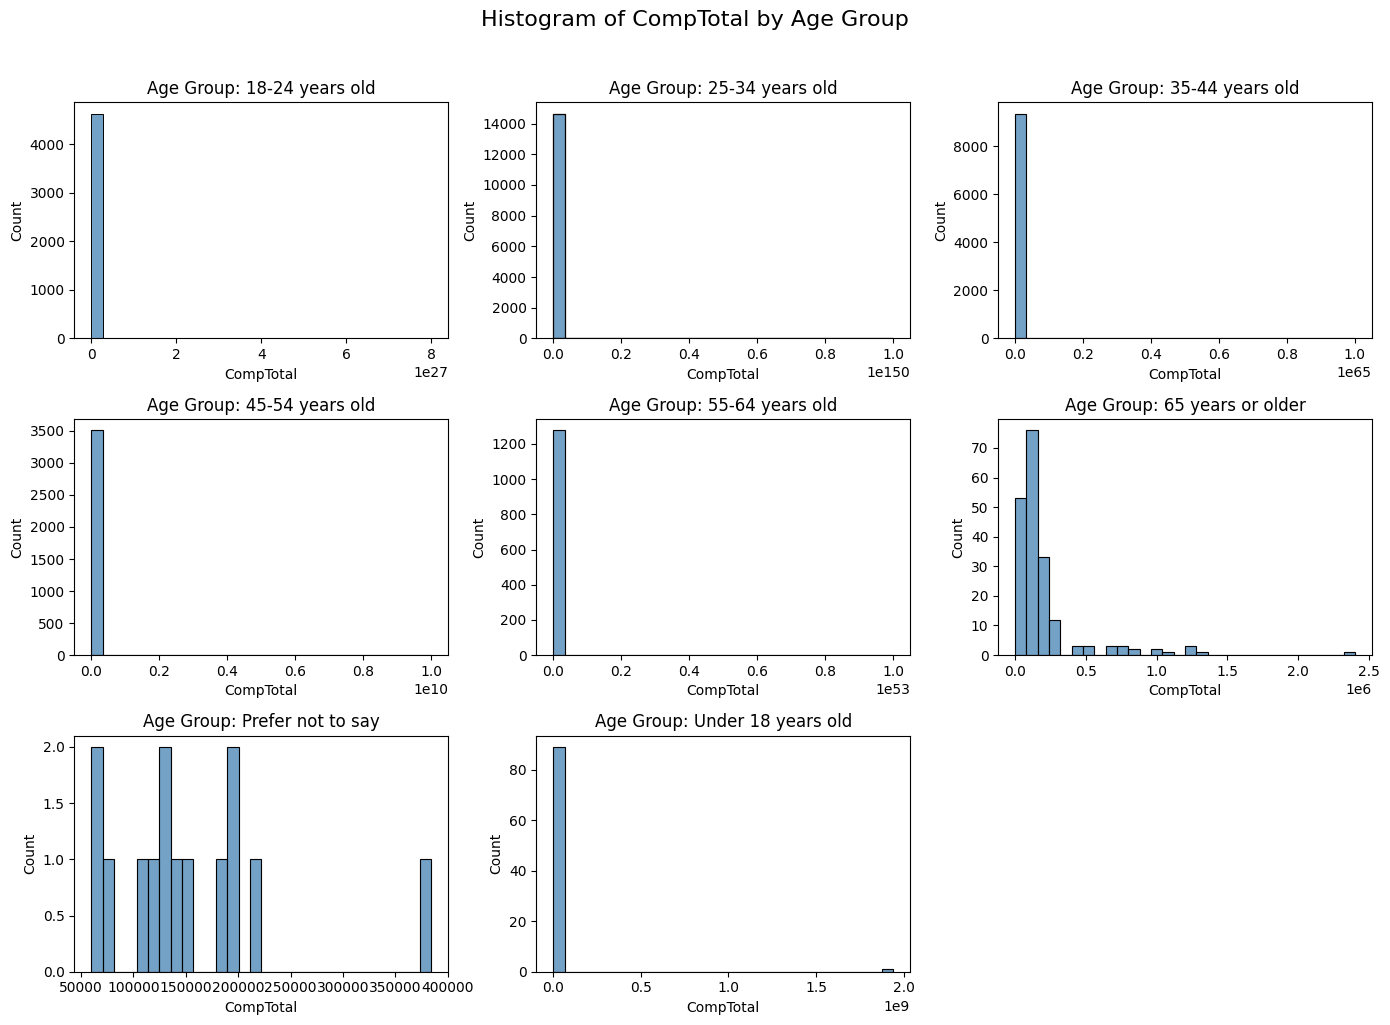

In [ ]:
## Write your code here
import seaborn as sns
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_comp_age = pd.read_sql_query(QUERY, conn)

df_comp_age['CompTotal'] = pd.to_numeric(df_comp_age['CompTotal'], errors='coerce')
df_comp_age = df_comp_age.dropna()

age_groups = df_comp_age['Age'].unique()
plt.figure(figsize=(14, 10))

for i, age_group in enumerate(sorted(age_groups), 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_comp_age[df_comp_age['Age'] == age_group]['CompTotal'], bins=30, kde=False, color='steelblue')
    plt.title(f'Age Group: {age_group}')
    plt.xlabel('CompTotal')
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Histogram of CompTotal by Age Group', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [ ]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df_search_age = pd.read_sql_query(QUERY, conn)


In [ ]:
df_clean = df_search_age[['Age', 'TimeSearching']].dropna()
df_clean = df_clean[df_clean['TimeSearching'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df_search_age['TimeSearching'] = df_search_age['TimeSearching'].astype(float)


In [ ]:
age_groups = df_search_age['Age'].dropna().unique()
n_groups = len(age_groups)

plt.figure(figsize=(18, 14))

for i, age in enumerate(sorted(age_groups)):
    plt.subplot((n_groups + 2) // 3, 3, i + 1)
    group = df_clean[df_clean['Age'] == age]
    if not group.empty:
        sns.histplot(group['TimeSearching'], bins=20, kde=False)
        plt.title(f'Age: {age}')
        plt.xlabel('Time Searching')
        plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Histogram of TimeSearching by Age Group', fontsize=20, y=1.02)
plt.show()

<Figure size 1800x1400 with 0 Axes>

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


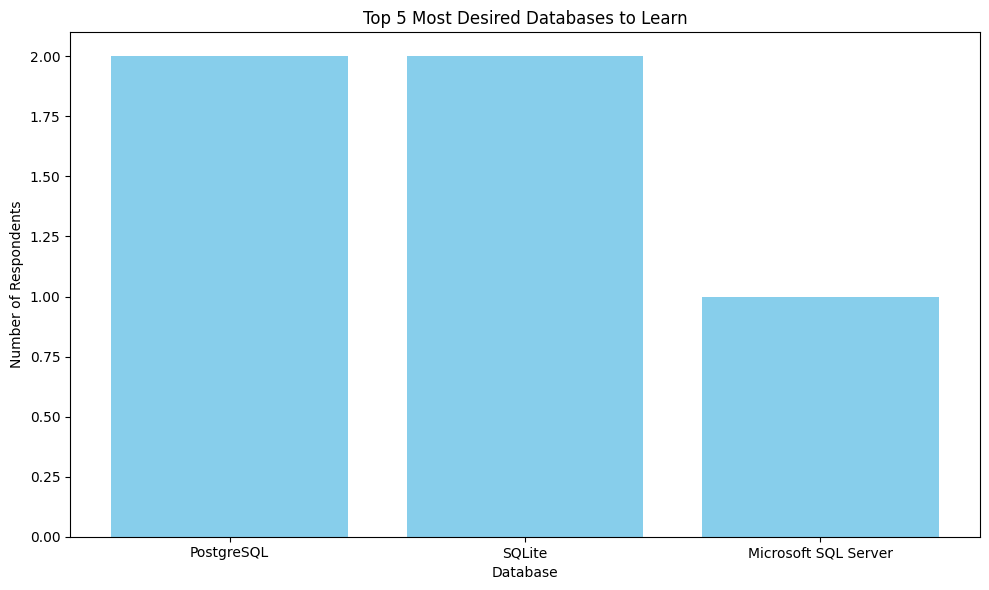

In [ ]:
## Write your code here
from collections import Counter
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""
df= pd.read_sql_query(QUERY, conn)

df_db = df['DatabaseWantToWorkWith'].dropna()

all_dbs = df_db.str.split(';')

flat_db_list = [db.strip() for sublist in all_dbs for db in sublist]

db_counts = Counter(flat_db_list)

top_5_dbs = db_counts.most_common(5)

db_names, db_freqs = zip(*top_5_dbs)

plt.figure(figsize=(10, 6))
plt.bar(db_names, db_freqs, color='skyblue')
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


<Figure size 1000x600 with 0 Axes>

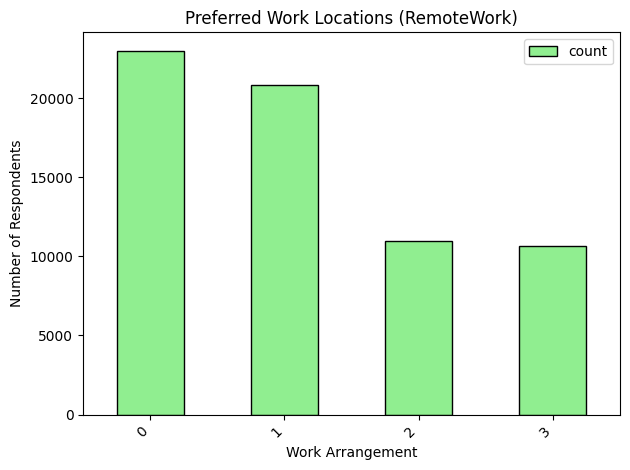

In [ ]:
## Write your code here
QUERY = """
SELECT RemoteWork, COUNT(*) as count
FROM main
GROUP BY RemoteWork
ORDER BY count DESC
"""
df_remotework = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
df_remotework.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


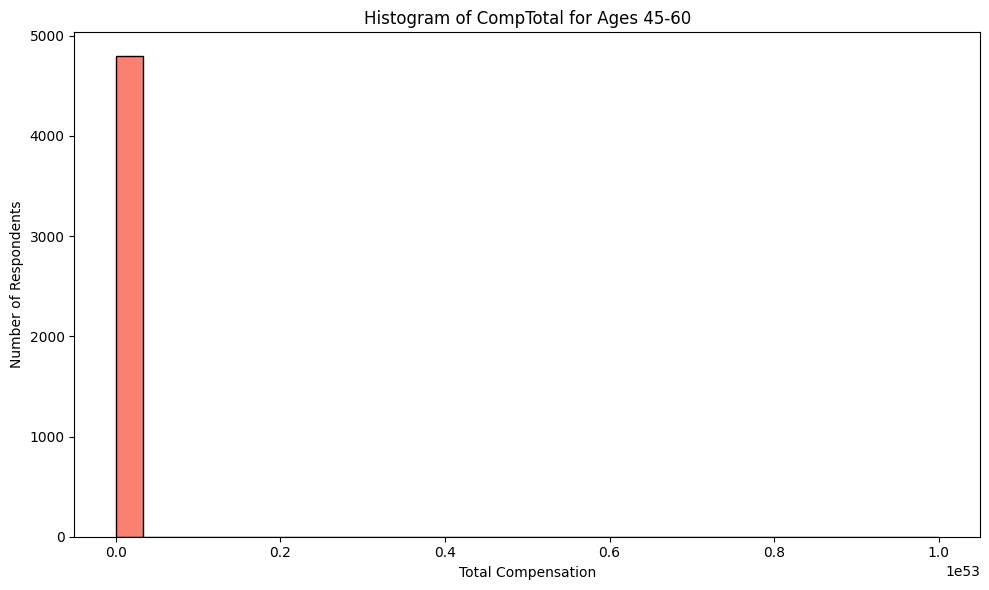

In [ ]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
"""
df_age_45_60 = pd.read_sql_query(QUERY, conn)

df_age_45_60 = df_age_45_60.dropna(subset=['CompTotal'])

plt.figure(figsize=(10, 6))
plt.hist(df_age_45_60['CompTotal'], bins=30, color='salmon', edgecolor='black')

plt.title('Histogram of CompTotal for Ages 45-60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['YearsCodePro'].unique()

array(['12', '27', '10', 'Less than 1 year', '18', '15', '17', '6', '7',
       '16', '14', '4', '8', '2', '29', '5', '30', '1', '25', '24', '26',
       '9', '20', '37', '11', '3', '13', '19', '21', '23', '34', '28',
       '32', '22', '33', '40', '39', '31', '35', '41', '38',
       'More than 50 years', '36', '43', '42', '50', '45', '44', '46',
       '48', '47', '49'], dtype=object)

In [ ]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

print(df['YearsCodePro'].unique())


[12 27 10  0 18 15 17  6  7 16 14  4  8  2 29  5 30  1 25 24 26  9 20 37
 11  3 13 19 21 23 34 28 32 22 33 40 39 31 35 41 38 51 36 43 42 50 45 44
 46 48 47 49]


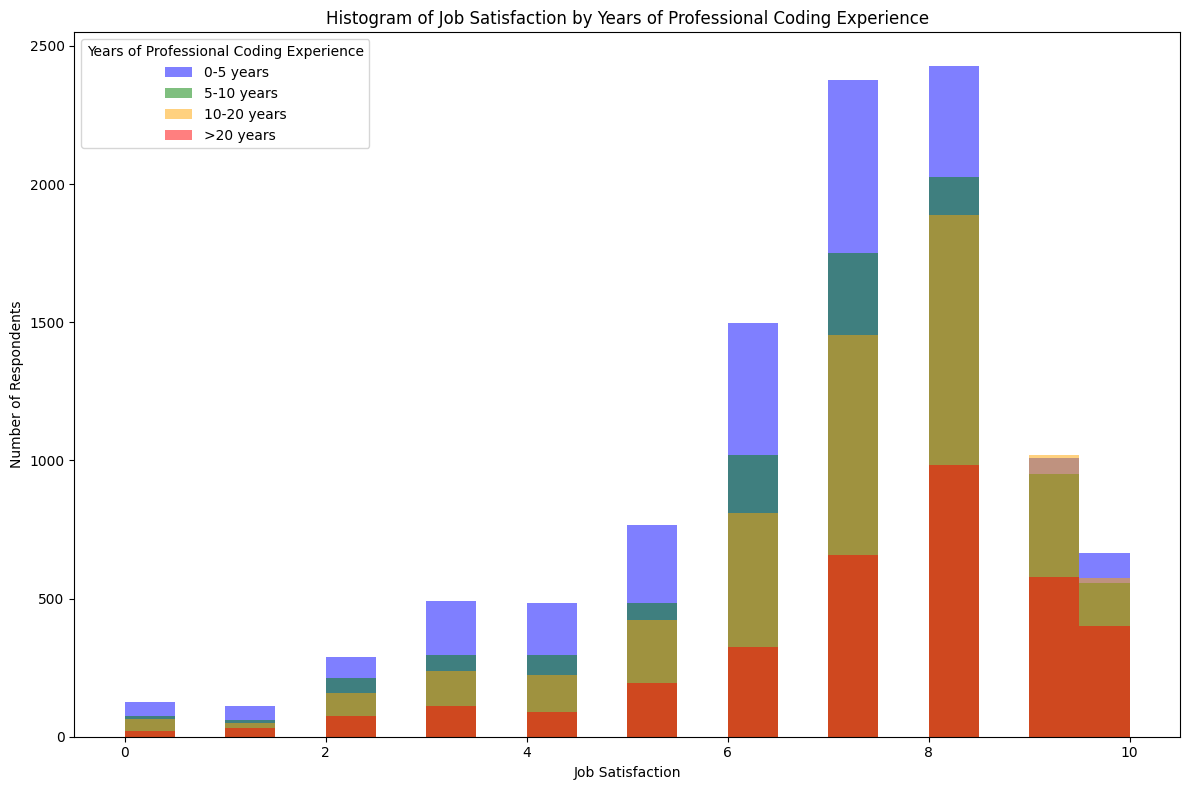

In [ ]:
df_filtered = df.dropna(subset=['JobSat', 'YearsCodePro'])

plt.figure(figsize=(12, 8))

plt.hist(df_filtered[df_filtered['YearsCodePro'] <= 5]['JobSat'], bins=20, alpha=0.5, label='0-5 years', color='blue')
plt.hist(df_filtered[(df_filtered['YearsCodePro'] > 5) & (df_filtered['YearsCodePro'] <= 10)]['JobSat'], bins=20, alpha=0.5, label='5-10 years', color='green')
plt.hist(df_filtered[(df_filtered['YearsCodePro'] > 10) & (df_filtered['YearsCodePro'] <= 20)]['JobSat'], bins=20, alpha=0.5, label='10-20 years', color='orange')
plt.hist(df_filtered[df_filtered['YearsCodePro'] > 20]['JobSat'], bins=20, alpha=0.5, label='>20 years', color='red')

plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.legend(title='Years of Professional Coding Experience')
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.
